In [ ]:
### Implementação de um perceptron

In [57]:
import numpy as np

class Perceptron():

    def __init__(self, tam_entrada, iters=100, taxa_aprendizado=0.01):
        """
        
        """
        self.iters = iters
        self.taxa_aprendizado = taxa_aprendizado
        # cria um array inicialmente com zeros, a 1a posicao do array sera o bias, as outras posições os pesos
        self.pesos = np.zeros(tam_entrada + 1) 
        self.erros = []
           
    def predict(self, entradas):
        somaZ = np.dot(entradas, self.pesos[1:]) + self.pesos[0]  # z = x*w + b
        if somaZ > 0:
            saida = 1
        else:
            saida = 0            
        return saida

    def train(self, X, y):
        for _ in range(self.iters):
            erros = 0
            for x_i, y_i in zip(X, y):
                y_pred = self.predict(x_i)
                erros += 1 if y_pred != y_i else 0
                self.pesos[1:] += self.taxa_aprendizado * (y_i - y_pred) * x_i
                self.pesos[0] += self.taxa_aprendizado * (y_i - y_pred)
            self.erros.append(erros) # conta erros em cada iteração
            if erros == 0:
                break
        return self.erros
    
    def modelo(self):
        print("Pesos:", self.pesos[1:], " Bias:", self.pesos[0])        

In [63]:
import matplotlib.pyplot as plt 
def plota_erros(erros):    
    epochs = np.arange(1, len(erros)+1)
    plt.plot(epochs, erros)
    plt.xlabel('Iterações')
    plt.ylabel('Erros de classificação')
    plt.show()

Pesos: [0.01 0.02]  Bias: -0.02


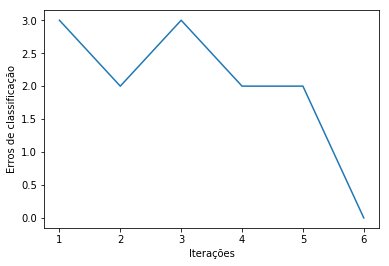

In [64]:
## Teste AND
x = []
x.append(np.array([1, 1]))
x.append(np.array([1, 0]))
x.append(np.array([0, 1]))
x.append(np.array([0, 0]))

labels = np.array([1, 0, 0, 0])

perceptron = Perceptron(2, 20)

erros = perceptron.train(x, labels)

inputs = np.array([1, 0])
perceptron.predict(inputs)
perceptron.modelo()
plota_erros( erros)

Pesos: [0.01 0.01]  Bias: 0.0


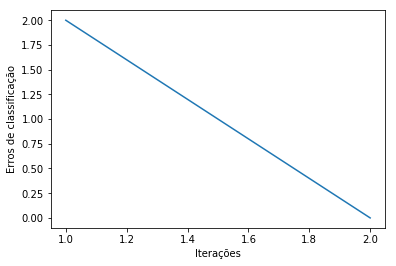

In [65]:
## Teste OR
x = []
x.append(np.array([1, 1]))
x.append(np.array([1, 0]))
x.append(np.array([0, 1]))
x.append(np.array([0, 0]))

labels = np.array([1, 1, 1, 0])

perceptron = Perceptron(2,20)

erros =perceptron.train(x, labels)

inputs = np.array([0, 1])
perceptron.predict(inputs) 
perceptron.modelo()
plota_erros(erros)

## Testando na base dados Iris

In [66]:
import pandas as pd
data_iris = pd.read_csv("iris.data", header = None)

In [67]:
# para utilizar essa base de dados é preciso retirar as flores do tipo Iris-virginica
# assim teremos duas classes separaveis linearmente
# a classe Iris-virginica ocupa as ultimas 50 posições do dataset, logo pegaremos as 100 primeiras

data_iris = data_iris[:100]

In [68]:
# Como o perceptron trabalha com dados binarios, vamos trocar as etiquetas Iris-setosa e Iris-versicolor
# respectivametne por 0 e 1

data_iris[4] = np.where(data_iris.iloc[:, -1]=='Iris-setosa', 0, 1)

### Vamos plotar os dados para melhor visualiza-los

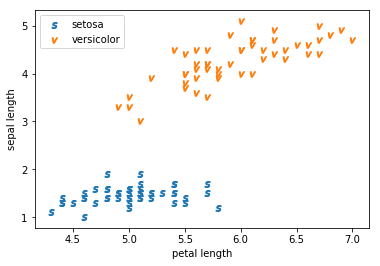

In [69]:
data_iris = np.asarray(data_iris, dtype = 'float64')

plt.scatter(data_iris[:50,0], data_iris[:50,2], marker='$s$', label='setosa')
plt.scatter(data_iris[50:,0], data_iris[50:,2], marker='$v$', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

Flor escolhida : Iris-setosa
[5.1 3.4 1.5 0.2 0. ]
Classificação : Iris-setosa
Pesos: [-0.011 -0.036  0.052  0.022]  Bias: -0.01


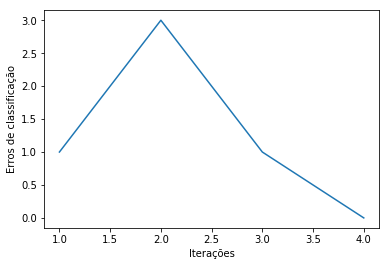

In [71]:
from random import randint

perceptron = Perceptron(4,20)
x = list(data_iris[:,:-1])
#x = data_iris[:,:-1]
labels = list(data_iris[:,-1])
erros =perceptron.train(x, labels)

# escolhe uma flor aleatoria e testa
inputs = data_iris[randint(0,len(data_iris))]
print("Flor escolhida :", "Iris-setosa" if inputs[-1]==0 else "Iris-versicolor")
print(inputs)
predicao = perceptron.predict(inputs[:-1]) 
print("Classificação :", "Iris-setosa" if predicao==0 else "Iris-versicolor")
perceptron.modelo()
plota_erros(erros)